<a href="https://colab.research.google.com/github/Neetika23/Machine-Learning/blob/master/Cartoonization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
from io import BytesIO
from PIL import Image
uploaded = files.upload()

Saving Audi-New-A6-Exterior-154582.jpg to Audi-New-A6-Exterior-154582 (1).jpg


In [20]:
im = Image.open(BytesIO(uploaded['Audi-New-A6-Exterior-154582.jpg']))

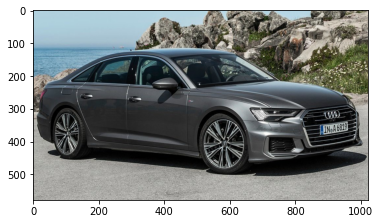

In [21]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [22]:
import cv2
import numpy as np

num_down = 2
num_bilateral = 7

img_rgb = cv2.imread("Audi-New-A6-Exterior-154582.jpg")
print(img_rgb.shape)

(578, 1022, 3)


In [23]:
img_rgb = cv2.resize(img_rgb,(800,800))

In [24]:
img_color = img_rgb
for _ in range(num_down):
  img_color = cv2.pyrDown(img_color)

In [25]:
for _ in range(num_bilateral):
  img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

In [26]:
for _ in range(num_down):
  img_color = cv2.pyrUp(img_color)

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray,7)
img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)

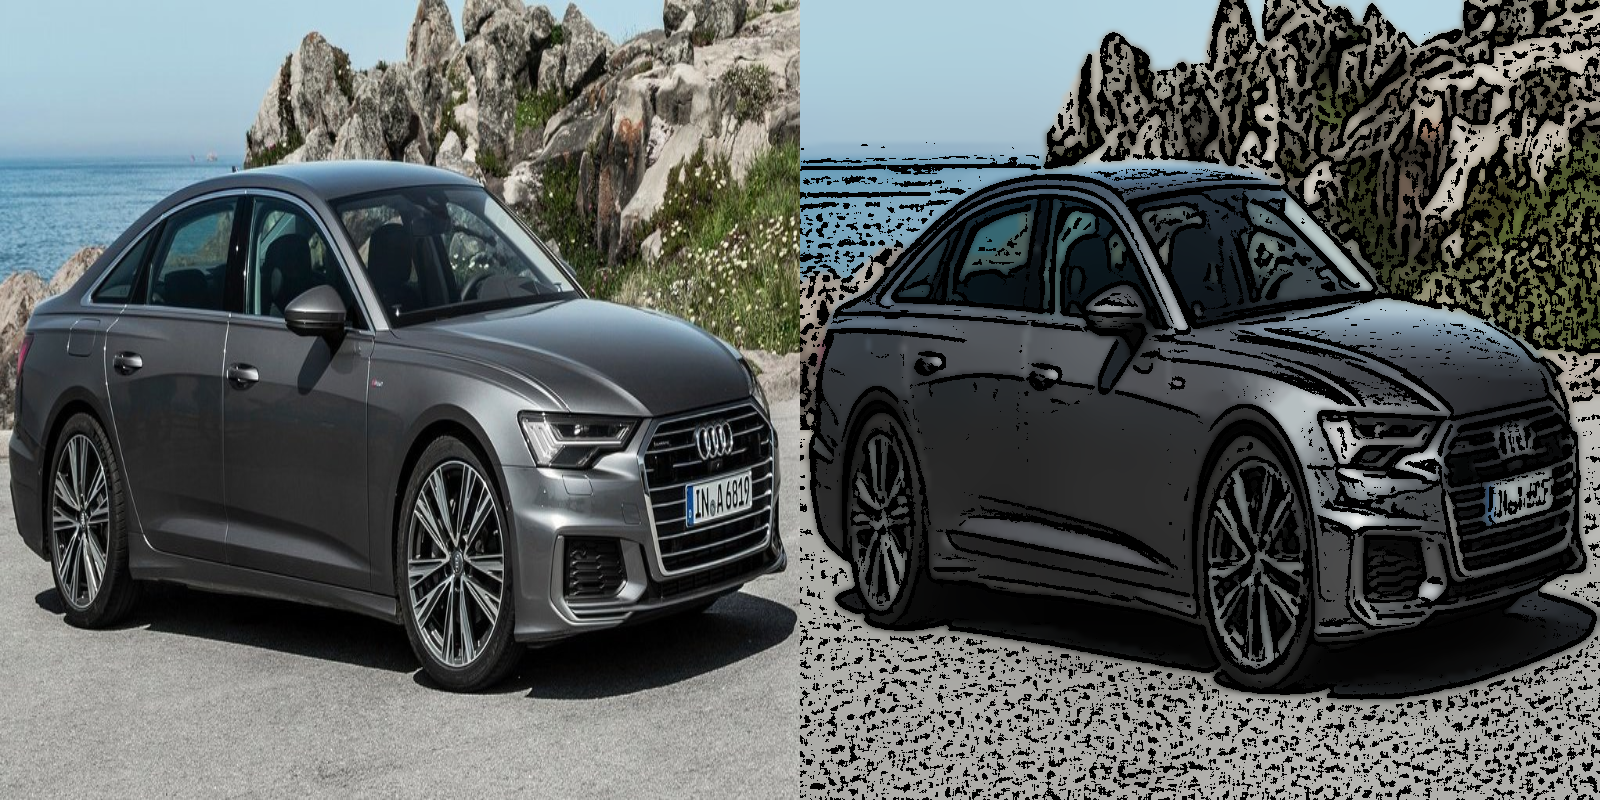

In [27]:
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge)

from google.colab.patches import cv2_imshow
stack = np.hstack([img_rgb,img_cartoon])
cv2_imshow(stack)